### 1. TUGAS EXAMPLE 2

### Create dan load data

In [ ]:
""""
TUGAS 2 :   Artificial Neural Network
NAMA    :   Muhammad Rizki Fatihah
NIM     :   247056003
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Loading Data
data = {
    'Input1': [1, 0, 1, 1],
    'Input2': [0, 0, 0, 1],
    'Input3': [0, 1, 1, 1],
    'Output': [0, 0, 0, 1]
}
df = pd.DataFrame(data)
df

,Input1,Input2,Input3,Output
0,1,0,0,0
1,0,0,1,0
2,1,0,1,0
3,1,1,1,1


### Inisialisasi Parameter

In [33]:
learning_rate = 0.1
epochs = 10
weights = np.zeros(3)  # tiga input
bias = 0

### Fungsi Aktivasi

In [34]:
def step_function(x):
    return 1 if x >= 0 else 0

### Pelatihan Model dengan Format Epoch Standar

In [35]:
# Step 4: Pelatihan Model dengan Format Epoch Standar
print("Epoch | Akurasi   | Bobot                 | Bias")
print("------------------------------------------------")

for epoch in range(epochs):
    correct_predictions = 0  # Counter untuk menghitung prediksi benar
    
    for index, row in df.iterrows():
        # Input dan Target
        inputs = np.array([row['Input1'], row['Input2'], row['Input3']])
        target = row['Output']
        
        # Perhitungan Output
        weighted_sum = np.dot(weights, inputs) + bias
        prediction = step_function(weighted_sum)
        
        # Perbarui Bobot dan Bias jika Prediksi Salah
        error = target - prediction
        weights += learning_rate * error * inputs
        bias += learning_rate * error
        
        # Hitung prediksi benar
        if prediction == target:
            correct_predictions += 1
    
    # Hitung akurasi untuk setiap epoch
    accuracy = (correct_predictions / len(df)) * 100
    
    # Print hasil tiap epoch dengan format standar
    print(f"{epoch+1:5d} | {accuracy:8.2f}% | {weights} | {bias:.2f}")

Epoch | Akurasi   | Bobot                 | Bias
------------------------------------------------
    1 |    50.00% | [0.  0.1 0.1] | 0.00
    2 |    25.00% | [0.  0.2 0.1] | -0.10
    3 |    75.00% | [0.  0.2 0. ] | -0.20
    4 |   100.00% | [0.  0.2 0. ] | -0.20
    5 |   100.00% | [0.  0.2 0. ] | -0.20
    6 |   100.00% | [0.  0.2 0. ] | -0.20
    7 |   100.00% | [0.  0.2 0. ] | -0.20
    8 |   100.00% | [0.  0.2 0. ] | -0.20
    9 |   100.00% | [0.  0.2 0. ] | -0.20
   10 |   100.00% | [0.  0.2 0. ] | -0.20


### Prediksi

In [36]:
def predict(input_data):
    weighted_sum = np.dot(weights, input_data) + bias
    return step_function(weighted_sum)


   Input1  Input2  Input3  Output  Predicted_Output
0       1       0       0       0                 0
1       0       0       1       0                 0
2       1       0       1       0                 0
3       1       1       1       1                 1


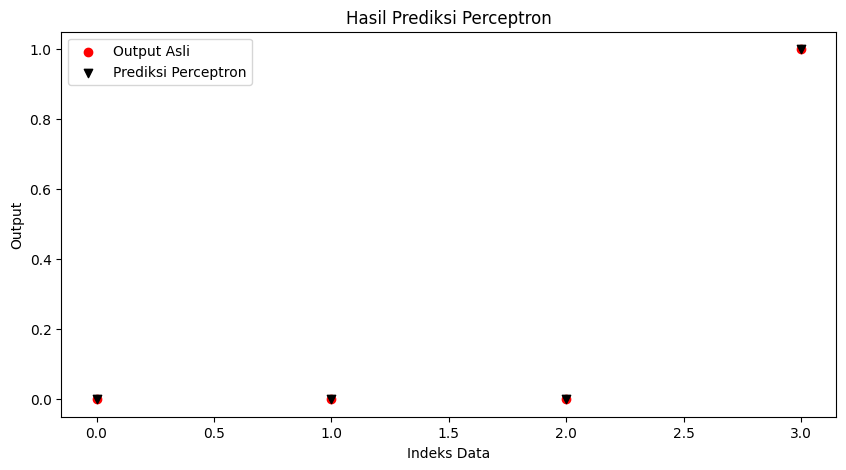

In [37]:
outputs = []
for index, row in df.iterrows():
    inputs = np.array([row['Input1'], row['Input2'], row['Input3']])
    outputs.append(predict(inputs))

# Menampilkan Hasil Prediksi vs Target
df['Predicted_Output'] = outputs
print(df)

# Visualisasi
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['Output'], color='red', label='Output Asli')
plt.scatter(df.index, df['Predicted_Output'], color='black', marker='v', label='Prediksi Perceptron')
plt.xlabel('Indeks Data')
plt.ylabel('Output')
plt.title('Hasil Prediksi Perceptron')
plt.legend()
plt.show()